# Checklist
- Data Info
- Data Describe
- Missing Values
- Duplicated Values
- Unique Values
- Correct Types
- Distributions & Outliers
- Correlations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.utils.visualize import Visualize

In [33]:
data = pd.read_csv('../data/raw/data_task1.csv')

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
data.Survived.dtype

dtype('int64')

In [49]:
cols = separate_data(data)
cols

{'time': [],
 'category': ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
 'continuous': ['PassengerId', 'Age', 'Fare'],
 'discrete': ['Survived', 'Pclass', 'SibSp', 'Parch']}

# Data Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Describe

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Missing Values

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Duplicated Values

In [9]:
data.duplicated().sum()

0

# Unique Values

In [10]:
for feature in data.columns:
    print(feature, ':', len(data[feature].unique()))

PassengerId : 418
Survived : 2
Pclass : 3
Name : 418
Sex : 2
Age : 80
SibSp : 7
Parch : 8
Ticket : 363
Fare : 170
Cabin : 77
Embarked : 3


# Outliers
There aren't any numerical columns.

In [41]:
counts = data['Sex'].value_counts().sort_values(ascending=False)
x = counts.index[0:7]
y = counts[0:7]

Text(0.5, 1.0, 'sfas')

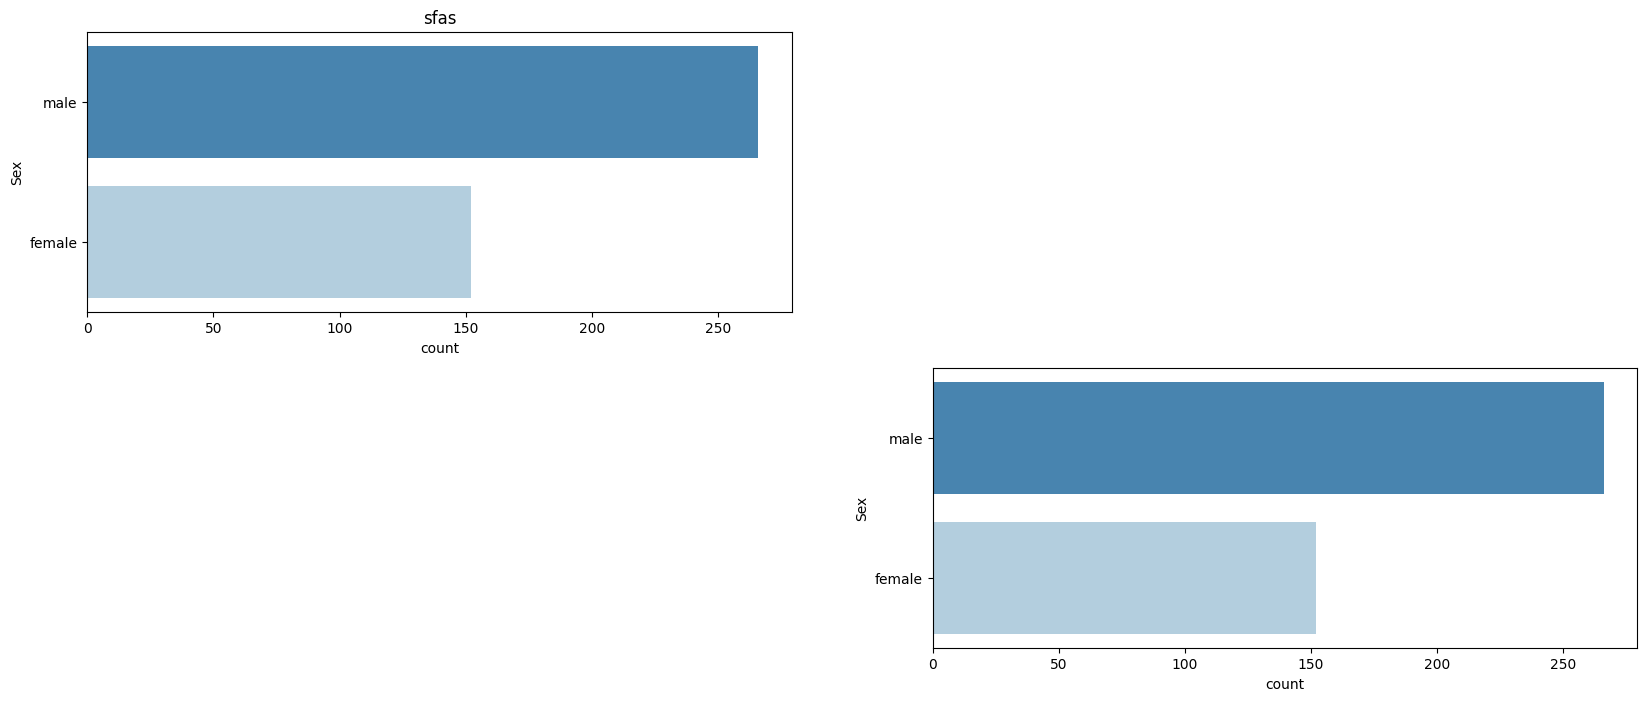

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
cmap = sns.color_palette('Blues_r', len(x))
sns.barplot(x=y, y=x, palette=cmap, hue=x, orient='h', ax=axes[0, 0])
sns.barplot(x=y, y=x, palette=cmap, hue=x, orient='h', ax=axes[1, 1])
plt.delaxes(axes[0, 1])
plt.delaxes(axes[1, 0])
axes[0][0].set_title('sfas')

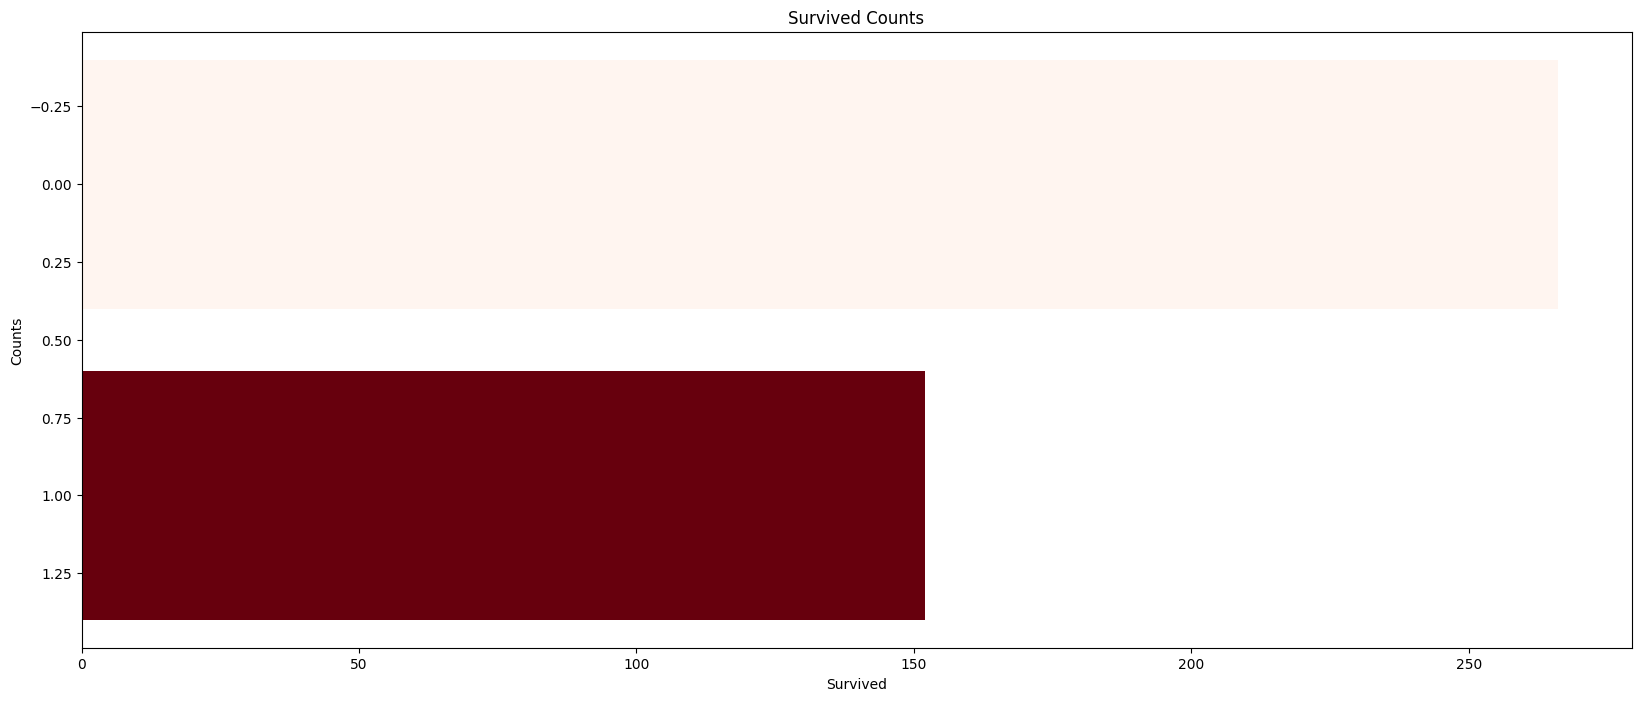

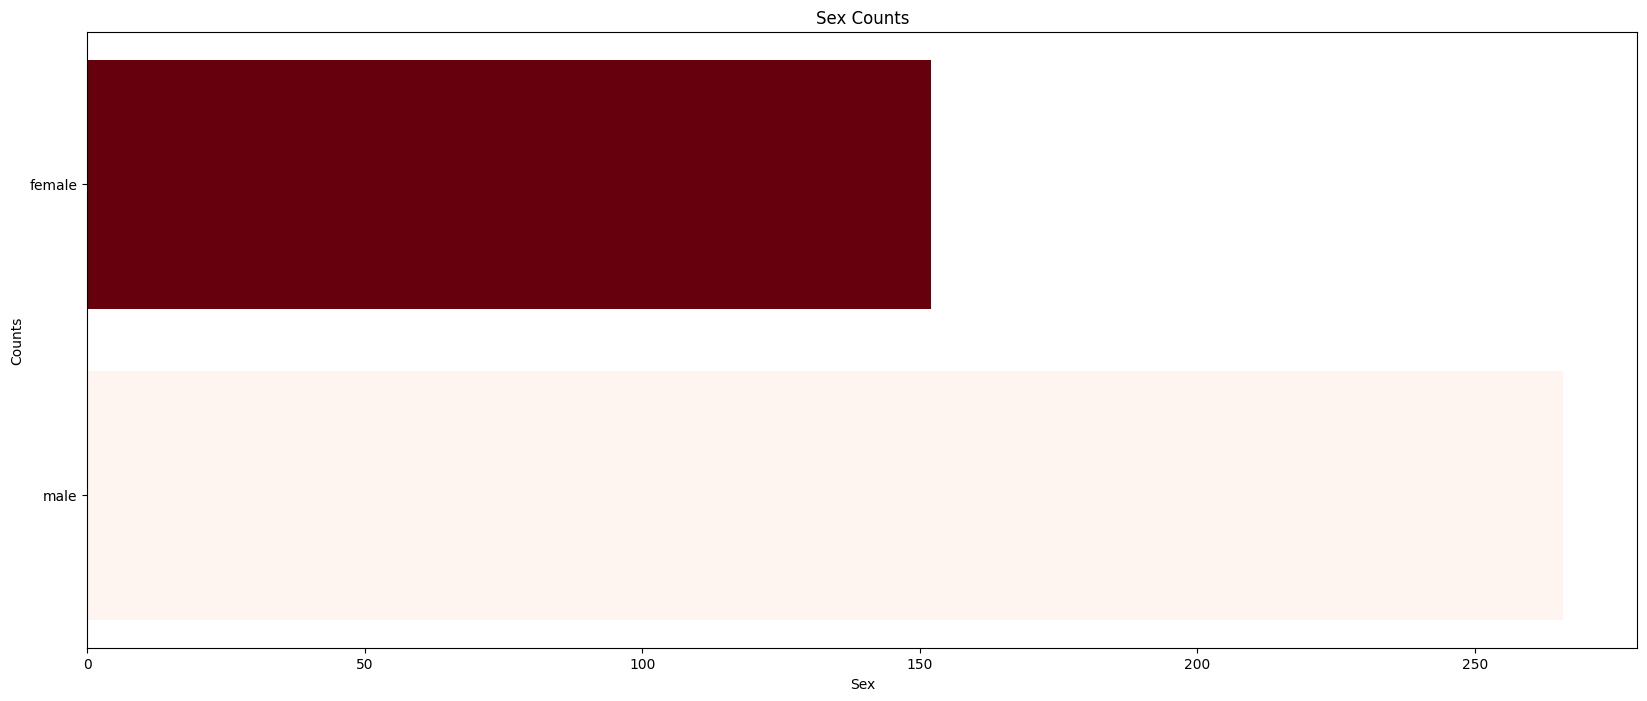

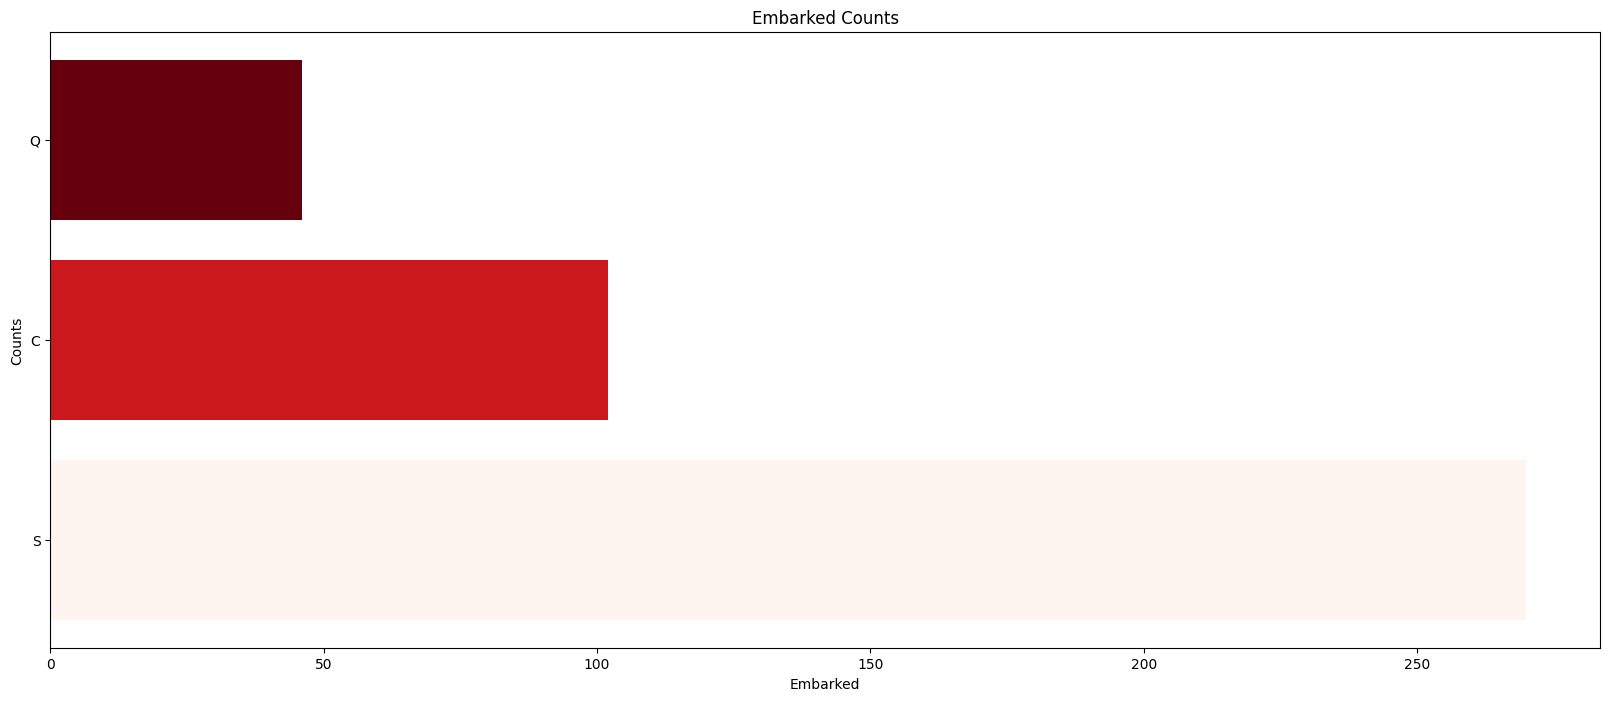

In [19]:
visualize = Visualize()
for feature in ['Survived', 'Sex', 'Embarked']:
    visualize.plot_counts(data[feature], ascending=True, max_items=10)

# Distributions

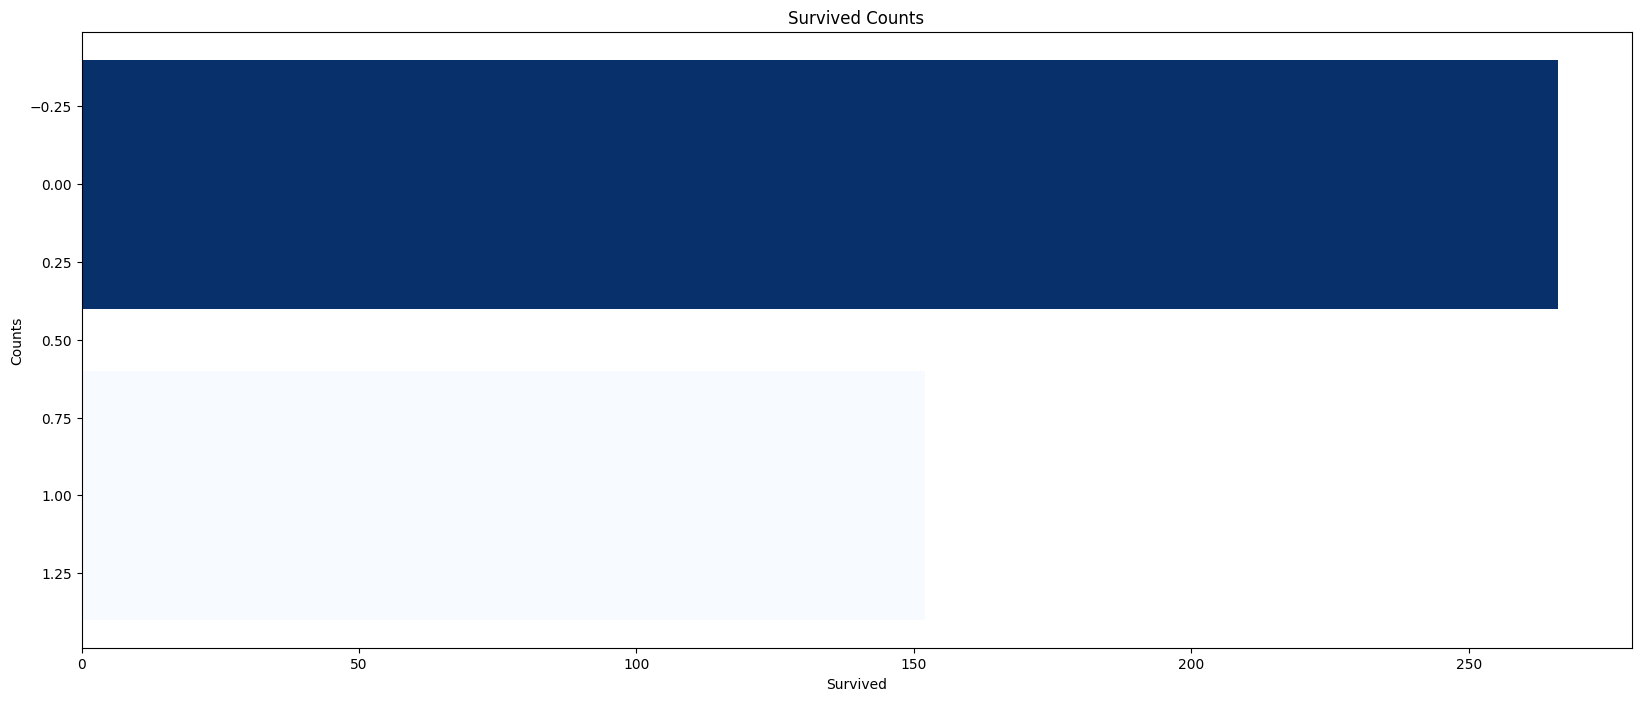

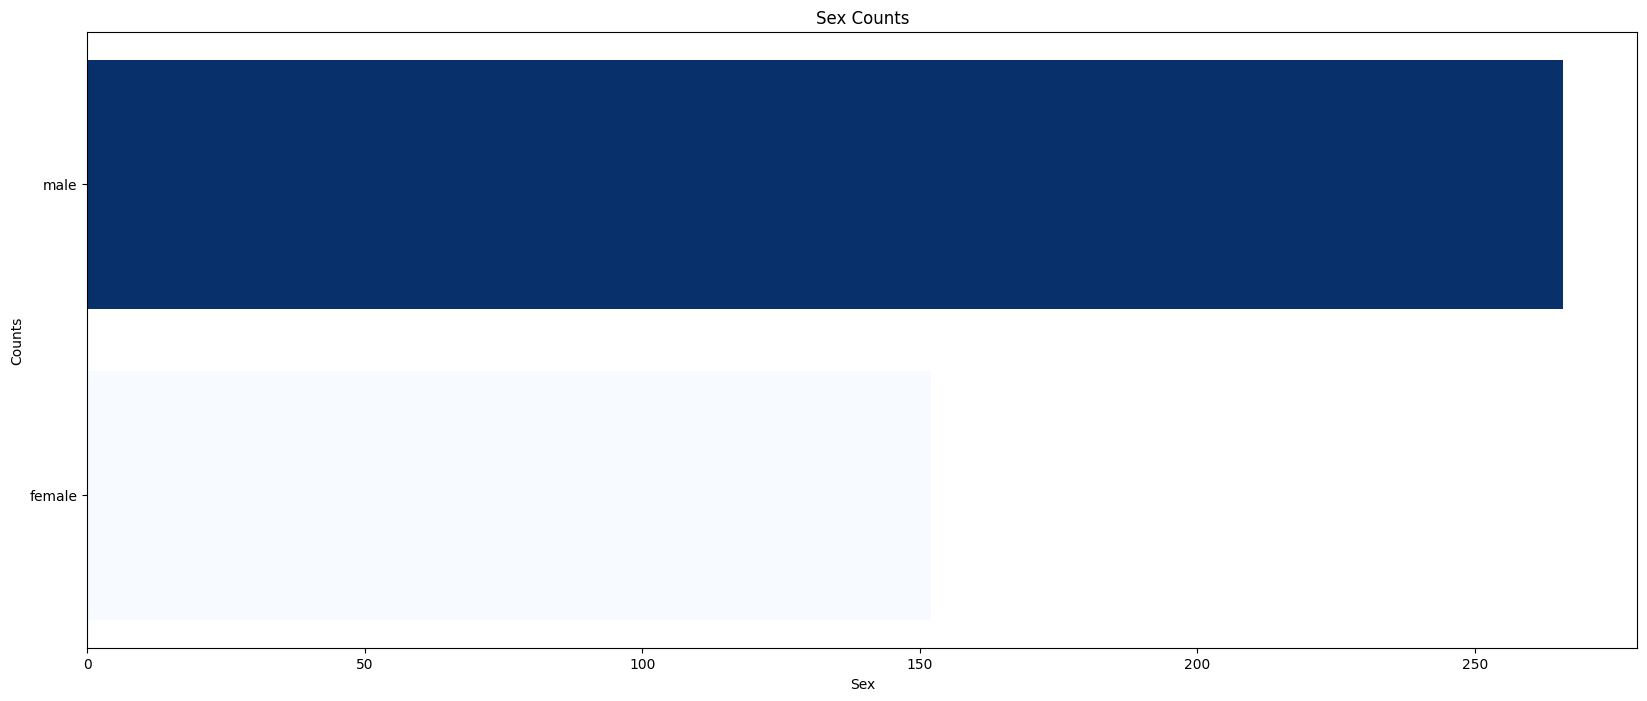

In [71]:
for feature in ['Survived', 'Sex']:
    visualize.plot_counts(data[feature], ascending=False, max_items=10)

# Correlations

In [17]:
data.corr()

ValueError: could not convert string to float: 'Kelly, Mr. James'

# Conclusion
- There are many missing values
- There are few duplicates
- Values in degrees can be simplified
- Funds can be converted to numerical feature
- New features might be needed